### TODO
- tc model for two variables with no correlated erros - use state space inference library
- set aprioprete priors
  - trend, cycle, initial
  - estimate stds 
  - minnesota priors
  - unconditional variance
  - prior predictive check


- estimate on simulated data
- estimate on real data
- add var error correlation
- add trend correlation
- extedn to more variables

In [16]:
import Pkg
Pkg.activate("../../../FinancialPlanner/_wip/TCVAR")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\TCVAR`


In [17]:
Pkg.add(url="https://github.com/TuringLang/SSMProblems.jl", subdir="GeneralisedFilters")
Pkg.add(url="https://github.com/TuringLang/SSMProblems.jl", subdir="SSMProblems")

    Updating git-repo `https://github.com/TuringLang/SSMProblems.jl`
   Resolving package versions...
  No Changes to `C:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\TCVAR\Project.toml`
  No Changes to `C:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\TCVAR\Manifest.toml`
    Updating git-repo `https://github.com/TuringLang/SSMProblems.jl`
   Resolving package versions...
  No Changes to `C:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\TCVAR\Project.toml`
  No Changes to `C:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\TCVAR\Manifest.toml`


In [3]:
using Revise
using LinearAlgebra
using SSMProblems
using GeneralisedFilters
using Turing
using PDMats
using StatsPlots

includet("TCVAR_model.jl")

In [5]:
#params_true = NamedTuple{(:στπ, :στr, :Φ11, :Φ12, :Φ21, :Φ22, :σcπ, :σcr)}((.02, .01, .6, .3, .4, .2, .015, .01))
   

In [262]:
 # True parameters (for simulation)
phi_true = [0.8 0.1; -0.1 0.7]
Qcycle_true = [0.05 0.01; 0.01 0.08] 
Qcycle_true[diagind(Qcycle_true)] .+= eps()
Qtrend_true = [0.0004 0.0; 0.0 0.0004]
Qtrend_true[diagind(Qtrend_true)] .+= eps()

true_tcvar_model = TCVAR(phi_true, Qtrend_true, Qcycle_true)

initial, states, test_obs = sample(true_tcvar_model, 100)



([-7.641987060177703, 1.1976441725987927, 1.683410945905301, -12.145914657186234], [[-7.645017655153252, 1.2198057972480791, -0.15403839758346044, -8.411832832357566], [-7.660099045549736, 1.2633074400201467, -1.2697970793960764, -5.975944859226458], [-7.627200146272263, 1.2527963207679693, -1.5388374137808805, -4.280249513265697], [-7.610763890820372, 1.2509330666124392, -1.6901666444872305, -3.3374577741647427], [-7.579702445450299, 1.271277136935343, -1.7631628939235355, -2.1227369642535496], [-7.536279682242763, 1.278495987790229, -0.9940315149629227, -1.0996479774338808], [-7.539097013802788, 1.2807829997353855, -0.6329067076918944, -0.3920549003391367], [-7.507534909440957, 1.2837536240782634, -0.25287579870785815, 0.22888221541277703], [-7.555184113114896, 1.2733080333202025, -0.3563799154416406, -0.06635527980761108], [-7.545642853095966, 1.2476754465496676, -0.1661877197165075, 0.06842845568834849]  …  [-7.594801980873285, 0.8200750356377694, -0.4025175679399007, -0.3022018283

In [263]:
Qcycle_true = [0 0; 0 0.0] 
Qtrend_true = [0 0; 0 0.0] 

model = TCVAR(phi_true, Qtrend_true, Qcycle_true)



StateSpaceModel{GeneralisedFilters.HomogeneousGaussianPrior{Vector{Float64}, Matrix{Float64}}, GeneralisedFilters.HomogeneousLinearGaussianLatentDynamics{Matrix{Float64}, Vector{Float64}, PDMat{Float64, Matrix{Float64}}}, GeneralisedFilters.HomogeneousLinearGaussianObservationProcess{Matrix{Float64}, Vector{Float64}, PDMat{Float64, Matrix{Float64}}}}(GeneralisedFilters.HomogeneousGaussianPrior{Vector{Float64}, Matrix{Float64}}([0.0, 0.0, 0.0, 0.0], [100.0 0.0 0.0 0.0; 0.0 100.0 0.0 0.0; 0.0 0.0 100.0 0.0; 0.0 0.0 0.0 100.0]), GeneralisedFilters.HomogeneousLinearGaussianLatentDynamics{Matrix{Float64}, Vector{Float64}, PDMat{Float64, Matrix{Float64}}}([1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 0.8 0.1; 0.0 0.0 -0.1 0.7], [0.0, 0.0, 0.0, 0.0], [2.220446049250313e-16 0.0 0.0 0.0; 0.0 2.220446049250313e-16 0.0 0.0; 0.0 0.0 2.220446049250313e-16 0.0; 0.0 0.0 0.0 2.220446049250313e-16]), GeneralisedFilters.HomogeneousLinearGaussianObservationProcess{Matrix{Float64}, Vector{Float64}, PDMat{Flo

In [264]:
model = trendcycle_model(test_obs)

chain = sample(model, Prior(), 1000)

Sampling   0%|█                                         |  ETA: N/A
Sampling 100%|██████████████████████████████████████████| Time: 0:00:00


PosDefException: PosDefException: matrix is not positive definite; Factorization failed.

In [265]:
n_samples = 500
chain = sample(model, NUTS(), n_samples)

Sampling   0%|█                                         |  ETA: N/A
Sampling 100%|██████████████████████████████████████████| Time: 0:00:00


PosDefException: PosDefException: matrix is not positive definite; Factorization failed.

In [122]:
display(summarystats(chain))
display(quantile(chain))

Summary Statistics
       parameters      mean       std      mcse   ess_bulk   ess_tail      rha ⋯
           Symbol   Float64   Float64   Float64    Float64    Float64   Float6 ⋯

   sigma_trend[1]    0.0294    0.0172    0.0024    55.3113   239.0514    1.035 ⋯
   sigma_trend[2]    0.1657    0.0165    0.0036    22.8092   133.5246    1.061 ⋯
  F_trend.L[1, 1]    1.0000    0.0000       NaN        NaN        NaN       Na ⋯
  F_trend.L[2, 1]    0.5934    0.3919    0.0366    48.4814    42.3438    1.021 ⋯
  F_trend.L[2, 2]    0.6635    0.2332    0.0247    85.5932    43.9007    1.018 ⋯
   sigma_cycle[1]    0.1836    0.0112    0.0010   117.7122   149.6085    1.028 ⋯
   sigma_cycle[2]    0.1796    0.0207    0.0021   107.1288   175.3849    1.018 ⋯
  F_cycle.L[1, 1]    1.0000    0.0000       NaN        NaN        NaN       Na ⋯
  F_cycle.L[2, 1]    0.1972    0.1410    0.0214    70.9095    21.3550    1.009 ⋯
  F_cycle.L[2, 2]    0.9699    0.0263    0.0020   135.8230   147.9432    1.001 ⋯
        

Quantiles
       parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
           Symbol   Float64   Float64   Float64   Float64   Float64 

   sigma_trend[1]    0.0019    0.0165    0.0289    0.0412    0.0666
   sigma_trend[2]    0.1351    0.1534    0.1658    0.1778    0.1956
  F_trend.L[1, 1]    1.0000    1.0000    1.0000    1.0000    1.0000
  F_trend.L[2, 1]   -0.5853    0.4290    0.7221    0.8732    0.9711
  F_trend.L[2, 2]    0.2369    0.4720    0.6832    0.8695    0.9974
   sigma_cycle[1]    0.1636    0.1757    0.1837    0.1909    0.2075
   sigma_cycle[2]    0.1434    0.1645    0.1795    0.1917    0.2237
  F_cycle.L[1, 1]    1.0000    1.0000    1.0000    1.0000    1.0000
  F_cycle.L[2, 1]   -0.1731    0.1154    0.2148    0.2879    0.4322
  F_cycle.L[2, 2]    0.9017    0.9577    0.9765    0.9900    0.9997
              φ11    0.6618    0.7123    0.7373    0.7646    0.8088
              φ12    0.0365    0.1635    0.2354    0.2936    0.3933
              φ21    0.1844    0.23

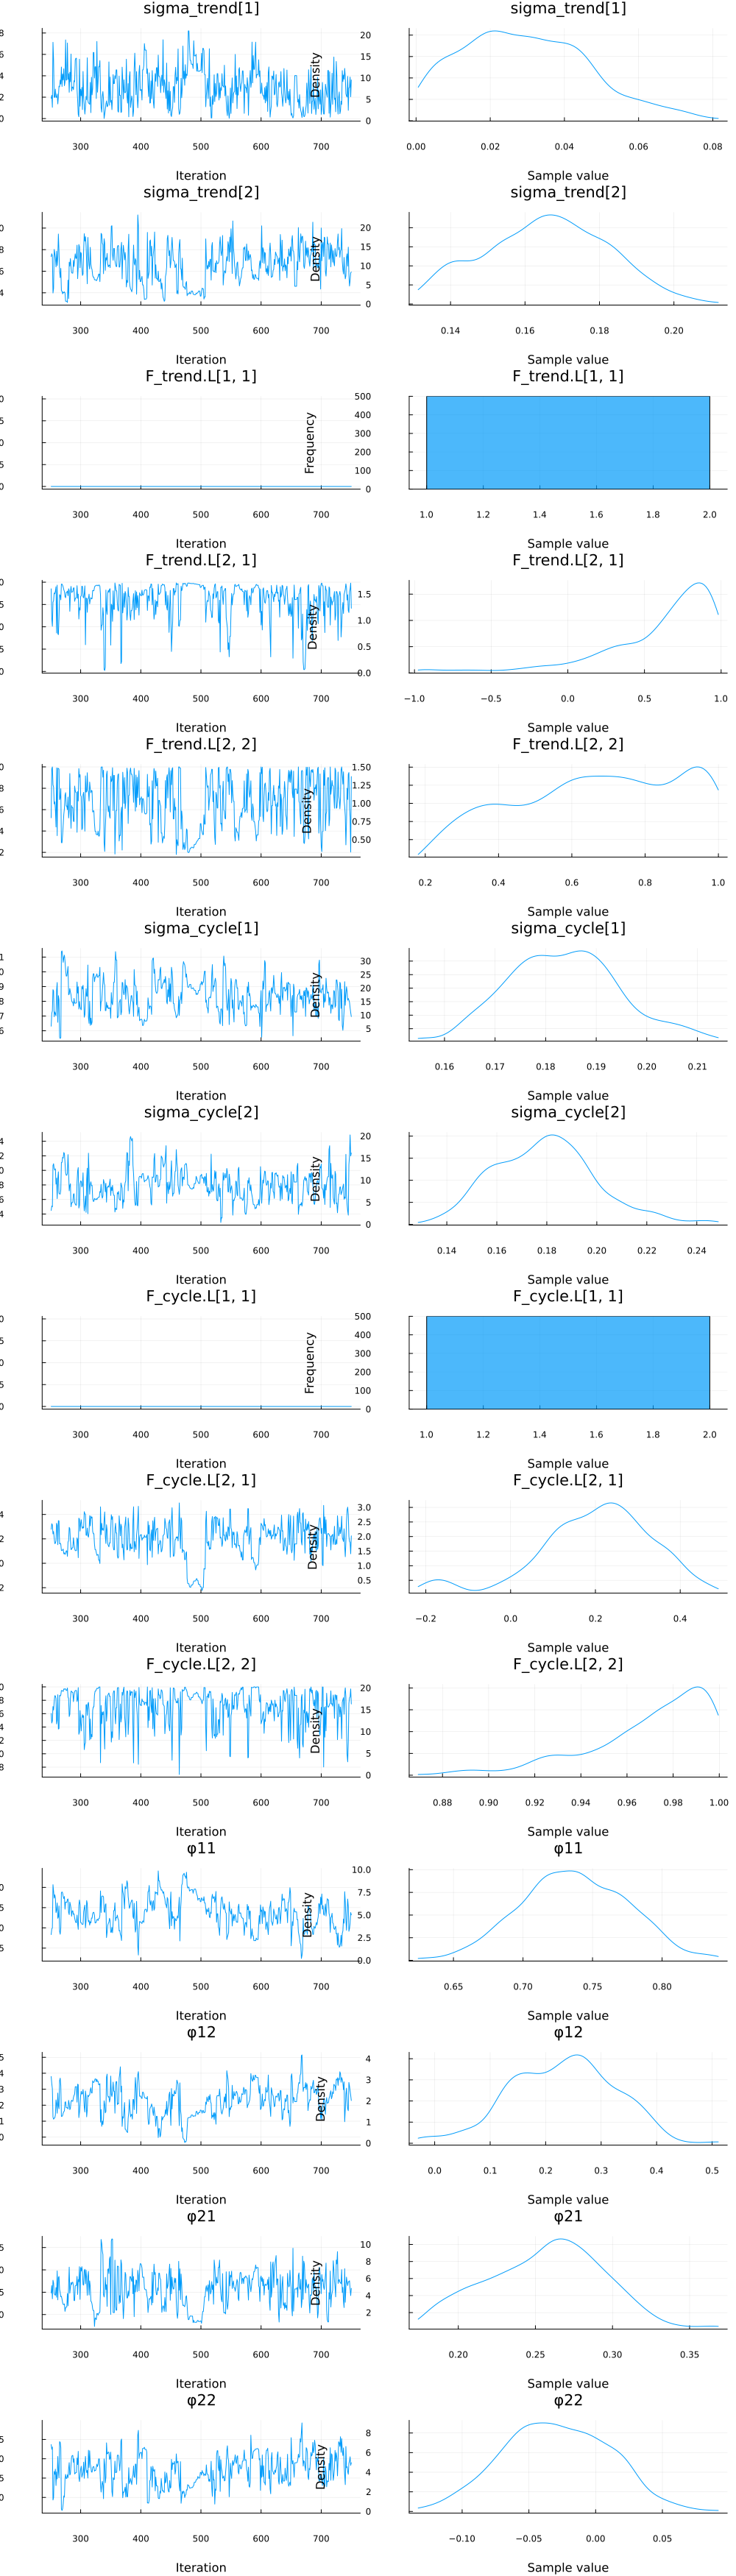

In [33]:
plot(chain)

In [121]:
priors = (
    initial_trend_mean = 0.03,
    initial_trend_std = 0.09,
    initial_cycle = (mean=0., 
                     std = .02)

)

priors.initial_cycle.std

0.02

In [5]:
priors = [1/100, 1/ 50]
display(priors)


2-element Vector{Float64}:
 0.01
 0.02

In [ ]:
n = 10_000
stds = zeros(n, 2)

for s in 1:n
    cov_m = rand(InverseWishart(100, diagm(priors.^2)))

    stds[s,:] = diag(cov_m) .^ .5

end

display(mean(stds, dims=1))
display(mean(stds, dims=1)) .* [100, 50]
display(mode(stds[:,1]))
display(mode(stds[:,2]))
display(std(stds, dims=1))


1×2 Matrix{Float64}:
 0.00101388  0.00202667

1×2 Matrix{Float64}:
 0.00101388  0.00202667

MethodError: MethodError: no method matching *(::Nothing, ::Int64)
The function `*` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:596
  *(!Matched::ChainRulesCore.NotImplemented, ::Any)
   @ ChainRulesCore C:\Users\matsz\.julia\packages\ChainRulesCore\Vsbj9\src\tangent_arithmetic.jl:37
  *(::Any, !Matched::ChainRulesCore.NotImplemented)
   @ ChainRulesCore C:\Users\matsz\.julia\packages\ChainRulesCore\Vsbj9\src\tangent_arithmetic.jl:38
  ...


In [13]:
0.002 * 5

0.01

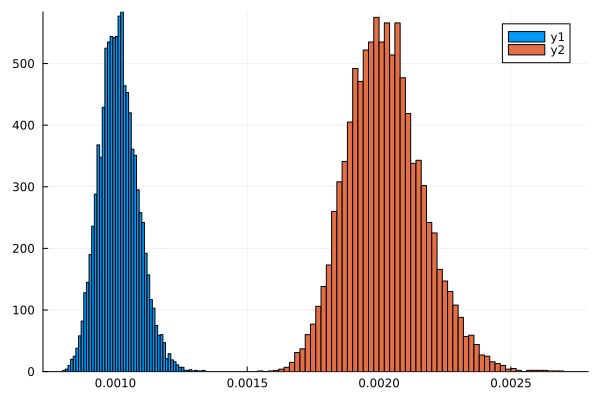

In [227]:
using Plots
histogram(stds)

In [228]:
stds_2 = rand(InverseGamma(100, 1/100), 10_000)
display(round(mean(stds_2), digits=4))
display(round(var(stds_2), digits=5))

0.0001

0.0

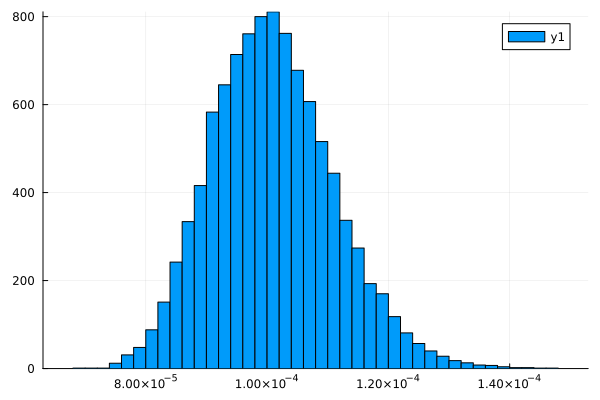

In [ ]:
histogram(stds_2)


In [192]:
stds_3 = rand(Exponential(.01), 10_000)
round(mean(stds_3), digits=4)

0.0099

1.0e-6

In [208]:
stds_4 = rand(truncated(Normal(.0001, .0001/50), lower=0), 10_000)
round(mean(stds_4), digits=4)

0.0001

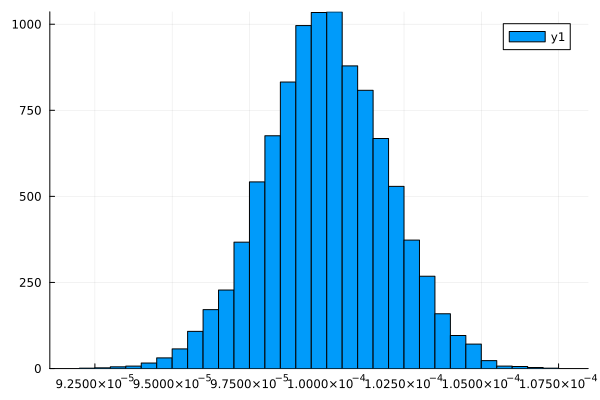

In [209]:
histogram(stds_4)

In [273]:
for n in 1:10_000
    s1  = rand(InverseWishart(4, [.0001 0; 0 .0001]))
    s2  = rand(InverseWishart(4, [.01 0; 0 .04]))
    Q  = zeros(4,4)
    Q[1:2, 1:2] = s1
    Q[3:4, 3:4] = s2
    Q = PDMat(Q)
    if !isposdef(Q)
        println("not positive define")
    end
end